## Import the Modules

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from python_files.fetch_missing_data import fetch_missing_data
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor

## Clean the data

In [3]:
data = pd.read_csv('../data/AllMoviesDetailsCleaned.csv')
data.head()

/tmp/ipykernel_3113/1057679917.py:1: DtypeWarning: Columns (27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/AllMoviesDetailsCleaned.csv')


,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,production_companies_number,production_countries_number,spoken_languages_number,budget_new,revenue_new,popularity_new,vote_average_new,vote_count_new,belongs_to_collection_x,belongs_to_collection
0,2,0,Drama|Crime,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,NaN,Villealfa Filmproduction Oy,Finland,...,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,0,Drama|Comedy,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",NaN,Villealfa Filmproduction Oy,Finland,...,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,NaN,Miramax Films,United States of America,...,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",NaN,Universal Pictures,Japan,...,3,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,42000,Documentary,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,NaN,inLoops,Austria,...,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df= data.copy()

In [6]:
df.shape

(329074, 29)

In [7]:
df.describe()

,id,budget,popularity,revenue,runtime,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number,budget_new,revenue_new,popularity_new,vote_average_new,vote_count_new
count,329074.000000,3.290740e+05,4299.000000,3.290740e+05,292282.000000,329074.000000,329074.000000,329074.000000,329074.000000,329074.000000,4.299000e+03,4.299000e+03,4299.000000,4299.000000,4299.000000
mean,252968.854899,8.683204e+05,19.862385,2.236717e+06,60.410877,2.391715,28.757714,0.594942,0.609993,0.647669,2.012306e+07,5.377283e+07,19.862385,6.385571,1136.667597
std,138638.645851,7.926402e+06,22.166717,2.788750e+07,142.495658,3.134253,327.754144,1.038569,0.665176,0.672060,2.935169e+07,1.126381e+08,22.166717,0.841871,2205.184719
min,2.000000,0.000000e+00,0.600000,-1.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.600000,0.000000,0.000000
25%,124756.750000,0.000000e+00,10.097500,0.000000e+00,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+05,3.963292e+06,10.097500,5.900000,151.000000
50%,276456.500000,0.000000e+00,14.922000,0.000000e+00,71.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.080000e+06,1.787369e+07,14.922000,6.400000,399.000000
75%,370829.750000,0.000000e+00,22.589500,0.000000e+00,94.000000,5.500000,1.000000,1.000000,1.000000,1.000000,2.700000e+07,5.524500e+07,22.589500,6.965000,1158.000000
max,469219.000000,6.000000e+08,696.244000,2.920357e+09,51420.000000,10.000000,27803.000000,26.000000,26.000000,25.000000,3.800000e+08,2.920357e+09,696.244000,10.000000,27803.000000


/home/sourav/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


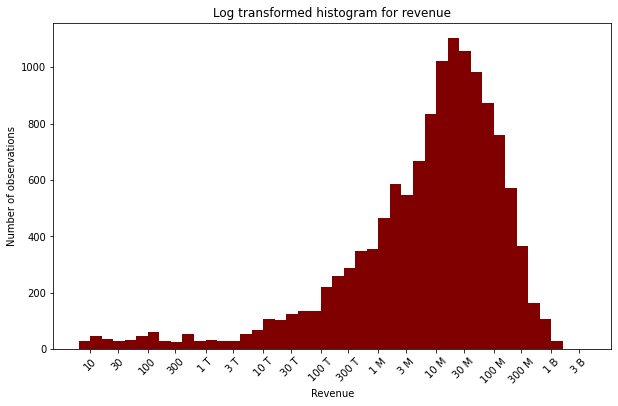

In [8]:
plt.figure(figsize=(10,6))
log_data = np.log10(df['revenue'] + 1) # add plus 1 to avoid log(0)
plt.xlabel('Revenue')
plt.ylabel('Number of observations')
plt.title('Log transformed histogram for revenue')
bin_edges = 10 ** np.arange(0.8, np.log10(df['revenue'].max()) + 0.2, 0.2)
plt.hist(df['revenue'], bins=bin_edges, color = 'maroon');
plt.xscale('log')
labels = [10, 30, 100, 300, '1 T', '3 T', '10 T', '30 T', '100 T', '300 T', '1 M', '3 M', '10 M', '30 M', '100 M', '300 M', '1 B', '3 B']
tick_locs = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000, 10000000, 30000000, 100000000, 300000000, 1000000000, 3000000000]
plt.xticks(tick_locs, labels, rotation=45);

**Assumption:** We will only take data with revenue greater than 3K

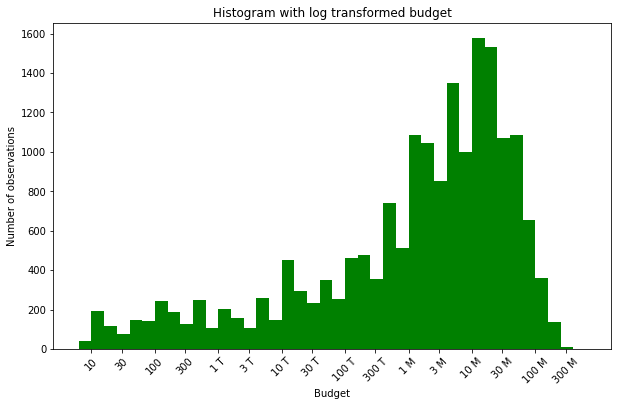

In [9]:
# log transforming the data
plt.figure(figsize=(10,6))
log_data = np.log10(df['budget'] + 1) # add plus 1 to avoid log(0)
plt.xlabel('Budget')
plt.ylabel('Number of observations')
plt.title('Histogram with log transformed budget')
bin_edges = 10 ** np.arange(0.8, np.log10(df['budget'].max()) + 0.2, 0.2)
plt.hist(df['budget'], bins=bin_edges, color = 'green');
plt.xscale('log')
labels = [10, 30, 100, 300, '1 T', '3 T', '10 T', '30 T', '100 T', '300 T', '1 M', '3 M', '10 M', '30 M', '100 M', '300 M']
tick_locs = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000, 10000000, 30000000, 100000000, 300000000]
plt.xticks(tick_locs, labels, rotation=45);

In [10]:
df = df[(df['revenue'] > 3000) & (df['budget'] > 300000)]
df.shape

(8650, 29)

## Remove Duplicates

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(8644, 29)

## Split the data

In [13]:
# drop rows with null values in numeric variables
df.dropna( axis=0, how='any', subset=['release_date'], inplace= True )

In [14]:
X = df.drop(columns = ['revenue', 'budget_new', 'revenue_new', 'popularity_new', 'vote_average_new', 'vote_count_new',\
                      'belongs_to_collection_x'])
y = df['revenue']

In [15]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Handle Missing Data

In [16]:
X_train.isnull().sum()

id                                0
budget                            0
genres                          166
imdb_id                         157
original_language                 0
original_title                    0
overview                         64
popularity                     4247
production_companies              0
production_countries              0
release_date                      0
runtime                          12
spoken_languages                 54
status                            2
tagline                        2462
title                             0
vote_average                      0
vote_count                        0
production_companies_number       0
production_countries_number       0
spoken_languages_number           0
belongs_to_collection          5748
dtype: int64

In [17]:
X_train.popularity.replace(np.nan, 0, inplace= True)

In [18]:
# Sustituting the missing runtime value with mean 
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train[['runtime']] = imp_mean.fit_transform(X_train[['runtime']])

In [19]:
# substituing the empty genres with most common value: "comedy"
most_common_genres = df['genres'].describe()['top']
X_train['genres'] = X_train['genres'].apply(lambda x: most_common_genres if x == {} else x)  

In [20]:
X_train.isna().sum()

id                                0
budget                            0
genres                          166
imdb_id                         157
original_language                 0
original_title                    0
overview                         64
popularity                        0
production_companies              0
production_countries              0
release_date                      0
runtime                           0
spoken_languages                 54
status                            2
tagline                        2462
title                             0
vote_average                      0
vote_count                        0
production_companies_number       0
production_countries_number       0
spoken_languages_number           0
belongs_to_collection          5748
dtype: int64

## Convert the data types

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6902 entries, 208534 to 174
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           6902 non-null   int64         
 1   budget                       6902 non-null   int64         
 2   genres                       6736 non-null   object        
 3   imdb_id                      6745 non-null   object        
 4   original_language            6902 non-null   object        
 5   original_title               6902 non-null   object        
 6   overview                     6838 non-null   object        
 7   popularity                   6902 non-null   float64       
 8   production_companies         6902 non-null   object        
 9   production_countries         6902 non-null   object        
 10  release_date                 6902 non-null   datetime64[ns]
 11  runtime                      6902 non-n

In [22]:
X_train['popularity'] = pd.to_numeric(X_train['popularity'])

## Handle Outliers

## Scaling

In [23]:
numerical_features = df.drop(columns = ['id','budget_new',
       'revenue_new', 'popularity_new', 'vote_average_new', 'vote_count_new', 'revenue']).select_dtypes(include = ['int64', 'float64']).columns
print(numerical_features)
categorical_features = df.drop(columns = ['imdb_id']).select_dtypes(include = ['object']).columns
print(categorical_features)

Index(['budget', 'popularity', 'runtime', 'vote_average', 'vote_count',
       'production_companies_number', 'production_countries_number',
       'spoken_languages_number'],
      dtype='object')
Index(['genres', 'original_language', 'original_title', 'overview',
       'production_companies', 'production_countries', 'spoken_languages',
       'status', 'tagline', 'title', 'belongs_to_collection_x',
       'belongs_to_collection'],
      dtype='object')


In [24]:
scaler = StandardScaler()

X_train_num = pd.DataFrame(scaler.fit_transform(X_train[numerical_features]), columns= numerical_features)
X_train_num.head()

,budget,popularity,runtime,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,-0.115782,-0.458262,0.730080,0.330122,-0.221046,-0.586547,-0.323047,0.762213
1,0.561304,-0.458262,0.357036,-0.142945,-0.347561,1.323277,1.012084,-0.406852
2,1.373808,-0.458262,1.289646,0.613963,-0.422015,-0.109091,-0.323047,0.762213
3,-0.684534,-0.458262,-0.016008,0.424736,-0.486392,1.323277,1.012084,1.931279
4,0.398804,-0.458262,0.263775,-0.142945,0.701507,-0.109091,-0.323047,0.762213


## Check the balancing

## Encoding categorical Data

## Feature Creation

## Feature Selection, Modelling, Feature Permutation

## Baseline Score

In [25]:
X_train_num.columns

Index(['budget', 'popularity', 'runtime', 'vote_average', 'vote_count',
       'production_companies_number', 'production_countries_number',
       'spoken_languages_number'],
      dtype='object')

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X_train_num, y_train, cv = 10)

baseline_score = scores.mean()

print("Baseline Score: ", baseline_score)

Baseline Score:  0.6263793773632053
